<a href="https://colab.research.google.com/github/tsangrebecca/BloomTech/blob/main/Sprint6/Module1/JDS_SHR_221_guided_project_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BloomTech Data Science

---


# Decision Trees

- clean data with **outliers and missing values**
- use scikit-learn for **decision trees**
- get and interpret **feature importances** of a tree-based model
- understand why decision trees are useful to model

In [1]:
%%capture
!pip install category_encoders==2.*
!pip install ydata_profiling==4.*

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# pd.options.display.max_rows = 100

# Downloading the Tanzania Waterpump Dataset

Make sure  you only use the dataset that is available through the **DS** **Kaggle Competition**. DO NOT USE any other Tanzania waterpump datasets that you might find online.

There are two ways you can get the dataset. Make sure you have joined the competition first!:

1. You can download the dataset directly by accessing the challenge and the files through the Kaggle Competition URL on Canvas (make sure you have joined the competition!)

2. Use the Kaggle API using the code in the following cells. This article provides helpful information on how to fetch your Kaggle Dataset into Google Colab using the Kaggle API.

> https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a

# Using Kaggle API to download dataset

In [ ]:
# # mounting your google drive on colab
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# #change your working directory, if you want to or have already saved your kaggle dataset on google drive.
# %cd /content/gdrive/My Drive/Colab Notebooks
# # update it to your folder location on drive that contians the dataset and/or kaggle API token json file.

In [ ]:
# # Download your Kaggle Dataset, if you haven't already done so
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle" # providing the config path to kaggle.json
# !kaggle competitions download -c bloomtech-water-pump-challenge # downloading dataset by running the Kaggle API command

In [ ]:
# Unzip your Kaggle dataset, if you haven't already done so.
# !unzip \*.zip  && rm *.zip

In [ ]:
# # List all files in your Kaggle folder on your google drive.
# !ls

In [ ]:
# train_features = pd.read_csv('train_features.csv')
# train_labels = pd.read_csv('train_labels.csv')
# test_features = pd.read_csv('test_features.csv')

### Data - Option 2
If you're having trouble with getting the Kaggle data mounted in Google Drive, here's another option...

In [17]:
DATAPATH = "https://raw.githubusercontent.com/bloominstituteoftechnology/DS-Unit-2-Kaggle-Challenge/master/data/kaggle/"

In [18]:
# merge the train features with train labels, and replace all 0 and -2.000000-08 with NaN values for all data
train = pd.merge(pd.read_csv(DATAPATH + 'train_features.csv', na_values =[0, -2.000000e-08]), pd.read_csv(DATAPATH + 'train_labels.csv'))
train_labels = pd.read_csv(DATAPATH + 'train_labels.csv')
X_test = pd.read_csv(DATAPATH + 'test_features.csv', na_values =[0, -2.000000e-08])

# I. Wrangle Data


In [7]:
train.head()

id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572.0      6000.0    2011-03-14         Roman      1390.0         Roman   
1   8776.0         NaN    2013-03-06       Grumeti      1399.0       GRUMETI   
2  34310.0        25.0    2013-02-25  Lottery Club       686.0  World vision   
3  67743.0         NaN    2013-01-28        Unicef       263.0        UNICEF   
4  19728.0         NaN    2011-07-13   Action In A         NaN       Artisan   

   longitude   latitude              wpt_name  num_private  ... water_quality  \
0  34.938093  -9.856322                  none          NaN  ...          soft   
1  34.698766  -2.147466              Zahanati          NaN  ...          soft   
2  37.460664  -3.821329           Kwa Mahundi          NaN  ...          soft   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu          NaN  ...          soft   
4  31.130847  -1.825359               Shuleni          NaN  ...          soft   

  quality_group      quantity  quantity_group                source  \
0          good        enough          enough                spring   
1          good  insufficient    insufficient  rainwater harvesting   
2          good        enough          enough                   dam   
3          good           dry             dry           machine dbh   
4          good      seasonal        seasonal  rainwater harvesting   

            source_type source_class              waterpoint_type  \
0                spring  groundwater           communal standpipe   
1  rainwater harvesting      surface           communal standpipe   
2                   dam      surface  communal standpipe multiple   
3              borehole  groundwater  communal standpipe multiple   
4  rainwater harvesting      surface           communal standpipe   

  waterpoint_type_group    status_group  
0    communal standpipe      functional  
1    communal standpipe      functional  
2    communal standpipe      functional  
3    communal standpipe  non functional  
4    communal standpipe      functional  

[5 rows x 41 columns]

In [9]:
train_labels.head()

id    status_group
0  69572      functional
1   8776      functional
2  34310      functional
3  67743  non functional
4  19728      functional

In [16]:
test_features.head()

id  amount_tsh date_recorded                  funder  gps_height  \
0  50785         0.0    2013-02-04                    Dmdd        1996   
1  51630         0.0    2013-02-04  Government Of Tanzania        1569   
2  17168         0.0    2013-02-01                     NaN        1567   
3  45559         0.0    2013-01-22              Finn Water         267   
4  49871       500.0    2013-03-27                  Bruder        1260   

    installer  longitude   latitude                 wpt_name  num_private  \
0        DMDD  35.290799  -4.059696  Dinamu Secondary School            0   
1         DWE  36.656709  -3.309214                  Kimnyak            0   
2         NaN  34.767863  -5.004344           Puma Secondary            0   
3  FINN WATER  38.058046  -9.418672           Kwa Mzee Pange            0   
4      BRUDER  35.006123 -10.950412          Kwa Mzee Turuka            0   

   ... payment_type water_quality quality_group      quantity  quantity_group  \
0  ...    never pay          soft          good      seasonal        seasonal   
1  ...    never pay          soft          good  insufficient    insufficient   
2  ...    never pay          soft          good  insufficient    insufficient   
3  ...      unknown          soft          good           dry             dry   
4  ...      monthly          soft          good        enough          enough   

                 source           source_type  source_class  \
0  rainwater harvesting  rainwater harvesting       surface   
1                spring                spring   groundwater   
2  rainwater harvesting  rainwater harvesting       surface   
3          shallow well          shallow well   groundwater   
4                spring                spring   groundwater   

      waterpoint_type waterpoint_type_group  
0               other                 other  
1  communal standpipe    communal standpipe  
2               other                 other  
3               other                 other  
4  communal standpipe    communal standpipe  

[5 rows x 40 columns]

### EDA

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59399 entries, 0 to 59398
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59399 non-null  float64
 1   amount_tsh             17761 non-null  float64
 2   date_recorded          59399 non-null  object 
 3   funder                 54987 non-null  object 
 4   gps_height             38962 non-null  float64
 5   installer              54967 non-null  object 
 6   longitude              57587 non-null  float64
 7   latitude               57587 non-null  float64
 8   wpt_name               59399 non-null  object 
 9   num_private            757 non-null    float64
 10  basin                  59399 non-null  object 
 11  subvillage             59028 non-null  object 
 12  region                 59399 non-null  object 
 13  region_code            59399 non-null  int64  
 14  district_code          59376 non-null  float64
 15  lg

## **IMPORTANT LINE OF CODE TO TELL YOU EVERYTHING ABOUT YOUR DATASET**

In [27]:
# much detailed report for our data
ProfileReport(train, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
# we can delete the column with lots of constants, lots of zeros and all unique values

#def wrangle(df):

In [19]:
def wrangle(df):

  # Set the index to 'id'
  df.set_index('id', inplace=True)

  # Drop Constant Column
  df.drop(columns='recorded_by', inplace=True)

  # Drop Duplicate Column
  df.drop(columns='quantity_group', inplace=True)

  # Drop High Cardinality Columns, code that we can reuse with copy and paste
  threshold = 100 # usually 20-100 so 100 unique values as a threshold is the most conservative approach
  cols_to_drop = [col for col in df.select_dtypes('object') if df[col].nunique() > threshold]
  df.drop(columns=cols_to_drop, inplace=True)

  # Drop columns with high proportion of zeros
  df.drop(columns='num_private', inplace=True)

  return df

train = wrangle(train)
X_test = wrangle(test_features)


In [20]:
X_test

amount_tsh  gps_height  longitude   latitude                    basin  \
id                                                                             
50785         0.0        1996  35.290799  -4.059696                 Internal   
51630         0.0        1569  36.656709  -3.309214                  Pangani   
17168         0.0        1567  34.767863  -5.004344                 Internal   
45559         0.0         267  38.058046  -9.418672  Ruvuma / Southern Coast   
49871       500.0        1260  35.006123 -10.950412  Ruvuma / Southern Coast   
...           ...         ...        ...        ...                      ...   
39307         0.0          34  38.852669  -6.582841              Wami / Ruvu   
18990      1000.0           0  37.451633  -5.350428                  Pangani   
28749         0.0        1476  34.739804  -4.585587                 Internal   
33492         0.0         998  35.432732 -10.584159               Lake Nyasa   
68707         0.0         481  34.765054 -11.226012               Lake Nyasa   

        region  region_code  district_code  population public_meeting  ...  \
id                                                                     ...   
50785  Manyara           21              3         321           True  ...   
51630   Arusha            2              2         300           True  ...   
17168  Singida           13              2         500           True  ...   
45559    Lindi           80             43         250            NaN  ...   
49871   Ruvuma           10              3          60            NaN  ...   
...        ...          ...            ...         ...            ...  ...   
39307    Pwani            6              1          20           True  ...   
18990    Tanga            4              7        2960           True  ...   
28749  Singida           13              2         200           True  ...   
33492   Ruvuma           10              2         150           True  ...   
68707   Ruvuma           10              3          40           True  ...   

            payment payment_type  water_quality quality_group      quantity  \
id                                                                            
50785     never pay    never pay           soft          good      seasonal   
51630     never pay    never pay           soft          good  insufficient   
17168     never pay    never pay           soft          good  insufficient   
45559       unknown      unknown           soft          good           dry   
49871   pay monthly      monthly           soft          good        enough   
...             ...          ...            ...           ...           ...   
39307     never pay    never pay           soft          good        enough   
18990  pay annually     annually          salty         salty  insufficient   
28749     never pay    never pay           soft          good  insufficient   
33492     never pay    never pay           soft          good  insufficient   
68707     never pay    never pay           soft          good           dry   

                     source           source_type source_class  \
id                                                               
50785  rainwater harvesting  rainwater harvesting      surface   
51630                spring                spring  groundwater   
17168  rainwater harvesting  rainwater harvesting      surface   
45559          shallow well          shallow well  groundwater   
49871                spring                spring  groundwater   
...                     ...                   ...          ...   
39307                 river            river/lake      surface   
18990          shallow well          shallow well  groundwater   
28749                   dam                   dam      surface   
33492                 river            river/lake      surface   
68707                spring                spring  groundwater   

          waterpoint_type waterpoint_type_group  
id            

There are zeros in the longitude and latitude data.

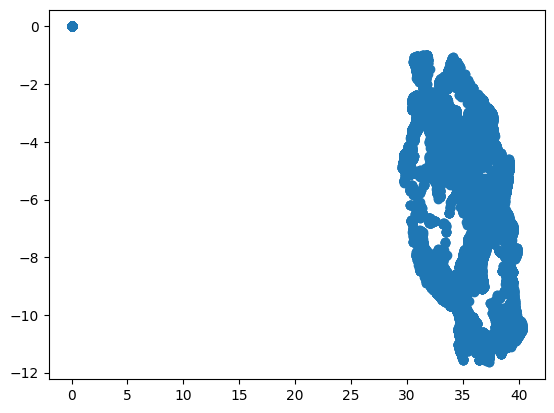

In [29]:
# null island!
# bunch of data coordinates at 0,0

plt.scatter(train['longitude'], train['latitude'])
plt.show()

In [30]:
train[train['latitude'] == 0]

Empty DataFrame
Columns: [id, amount_tsh, date_recorded, funder, gps_height, installer, longitude, latitude, wpt_name, num_private, basin, subvillage, region, region_code, district_code, lga, ward, population, public_meeting, recorded_by, scheme_management, scheme_name, permit, construction_year, extraction_type, extraction_type_group, extraction_type_class, management, management_group, payment, payment_type, water_quality, quality_group, quantity, quantity_group, source, source_type, source_class, waterpoint_type, waterpoint_type_group, status_group]
Index: []

[0 rows x 41 columns]

In [ ]:
# It's not that there are no zeros, but they're actually -2.00000e-08 a really small number. see cell below.

In [31]:
train[train['longitude'] == 0]

id  amount_tsh date_recorded                  funder  gps_height  \
21      6091         0.0    2013-02-10                    Dwsp           0   
53     32376         0.0    2011-08-01  Government Of Tanzania           0   
168    72678         0.0    2013-01-30                     Wvt           0   
177    56725         0.0    2013-01-17             Netherlands           0   
253    13042         0.0    2012-10-29                  Hesawa           0   
...      ...         ...           ...                     ...         ...   
59189  62177         0.0    2011-07-18                    Dwsp           0   
59208   3631         0.0    2013-01-22                    Dwsp           0   
59295  60843         0.0    2011-07-19                   Rwssp           0   
59324    748         0.0    2013-01-22            World Vision           0   
59374  49651         0.0    2012-10-29                   Rwssp           0   

          installer  longitude      latitude                 wpt_name  \
21              DWE        0.0 -2.000000e-08                 Muungano   
53       Government        0.0 -2.000000e-08                   Polisi   
168             WVT        0.0 -2.000000e-08             Wvt Tanzania   
177             DWE        0.0 -2.000000e-08  Kikundi Cha Wakina Mama   
253             DWE        0.0 -2.000000e-08                Kwakisusi   
...             ...        ...           ...                      ...   
59189           DWE        0.0 -2.000000e-08                   Wazazo   
59208           DWE        0.0 -2.000000e-08                  Mtakuja   
59295           DWE        0.0 -2.000000e-08                Maendeleo   
59324  World Vision        0.0 -2.000000e-08                 Mwazwilo   
59374           DWE        0.0 -2.000000e-08               Nguvu Kazi   

       num_private  ... water_quality quality_group      quantity  \
21               0  ...       unknown       unknown       unknown   
53               0  ...       unknown       unknown           dry   
168              0  ...          soft          good      seasonal   
177              0  ...          soft          good        enough   
253              0  ...          soft          good  insufficient   
...            ...  ...           ...           ...           ...   
59189            0  ...          soft          good        enough   
59208            0  ...          soft          good        enough   
59295            0  ...          soft          good        enough   
59324            0  ...          soft          good        enough   
59374            0  ...          soft          good        enough   

       quantity_group                source           source_type  \
21            unknown          shallow well          shallow well   
53                dry           machine dbh              borehole   
168          seasonal  rainwater harvesting  rainwater harvesting   
177            enough          shallow well          shallow well   
253      insufficient          shallow well          shallow well   
...               ...                   ...                   ...   
59189          enough          shallow well          shallow well   
59208          enough          shallow well          shallow well   
59295          enough          shallow well          shallow well   
59324          enough          shallow well          shallow well   
59374          enough          shallow well          shallow well   

      source_class              waterpoint_type waterpoint_type_group  \
21     groundwater                    hand pump             hand pump   
53     groundwater  communal standpipe multiple    communal standpipe   
168        surface           communal standpipe    communal standpipe   
177    groundwater                        other                 other   
253    groundwater                    hand pump             hand pump   
...            ...                          ...                   ...   
59189  groundwater         

In [ ]:
# so we decided to replace all the 0 and -2.0000e-08 with NaN in all the data set when we first read the data in. See above cells.

In [33]:
# To identify duplicate columns:
# The duplicate will only identify duplicate rows but not columns, so we need to traspose the data from rows to columns to use the duplicated()
# flip about 100 values, not the whole thing otherwise too slow
train.head(100).T.duplicated()

id                       False
amount_tsh               False
date_recorded            False
funder                   False
gps_height               False
installer                False
longitude                False
latitude                 False
wpt_name                 False
num_private              False
basin                    False
subvillage               False
region                   False
region_code              False
district_code            False
lga                      False
ward                     False
population               False
public_meeting           False
recorded_by              False
scheme_management        False
scheme_name              False
permit                   False
construction_year        False
extraction_type          False
extraction_type_group    False
extraction_type_class    False
management               False
management_group         False
payment                  False
payment_type             False
water_quality            False
quality_

In [ ]:
# quantity_group is a duplicate

# II. Split Data

## Split TV from FM

In [21]:
target = 'status_group'
y = train[target]
X = train.drop(columns=target) # the rest of the columns

## Training-Validation Split

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# III. Establish Baseline

- Is this a *regression* or a *classification* problem?

In [23]:
# baseline for a classification problem is the mode of the dataset
y_train.value_counts(normalize=True)

functional                 0.542583
non functional             0.384352
functional needs repair    0.073066
Name: status_group, dtype: float64

In [24]:
print('baseline accuracy:', y_train.value_counts(normalize=True).max() )

baseline accuracy: 0.5425829668132747


# IV. Build Model(s)

**First Model:** Logistic Regression
- we can also use multi-categorical classification with Log Reg, it just breaks it down to multiple binary classifications.
- Log Reg is still a linear model, but the coefficients pass through a sigmoid (S-curve) function

In [27]:
model_lr = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'), # replace all NaN values with mean
    StandardScaler(), # normalize each feature with mean = 0 and stddev = 1
    LogisticRegression(max_iter=200) # max number of iterations, if we don't specify this, we will reach the iteration limit
)

model_lr.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['basin', 'region', 'public_meeting',
                                     'scheme_management', 'permit',
                                     'extraction_type', 'extraction_type_group',
                                     'extraction_type_class', 'management',
                                     'management_group', 'payment',
                                     'payment_type', 'water_quality',
                                     'quality_group', 'quantity', 'source',
                                     'source_type', 'source_class',
                                     'waterpoint_type',
                                     'waterpoint_type_group'],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=200))])

**Second Model:** Decision Tree Classifier
- more flexible, might provide a better accuracy score than 73%
- work with non-linear data
- can have a lot of overfitting

In [41]:
model_dt = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    # don't need scaler because we're doing binary decisions, not distances
    DecisionTreeClassifier(random_state=42, max_depth=16)
)

model_dt.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['basin', 'region', 'public_meeting',
                                      'scheme_management', 'permit',
                                      'extraction_type',
                                      'extraction_type_group',
                                      'extraction_type_class', 'management',
                                      'management_group', 'payment',
                                      'payment_type', 'water_quality',
                                      'quality_group', 'quantity', 'source',
                                      'source_type', 'source_class',
                                      'waterpoint_type',
                                      'waterpoin...
hand pump                      2
other                          3
communal standpipe multiple    4
improved spring                5
cattle trough                  6
dam                            7
NaN                           -2
dtype: int64},
                                         {'col': 'waterpoint_type_group',
                                          'data_type': dtype('O'),
                                          'mapping': communal standpipe    1
hand pump             2
other                 3
improved spring       4
cattle trough         5
dam                   6
NaN                  -2
dtype: int64}])),
                ('simpleimputer', SimpleImputer()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=16, random_state=42))])

**Interlude: How does a tree model work?**

- if it's numerical, then we need to choose a threshold value to make the split. The threshold number that results in the lowest impurity will be chosen to make the split.
- Node impurity is a measure of the homogenity of the labels that are known.
- One way to measure is by minimizing entropy or measure of randomness within a dataset and maximizing information
- Another way is minimizing something called Gini impurity which is what we will use in our model, it is the probability of misclassifying data. The lower the GINI the better the split.
- We will always choose the feature to split on that will result in the lowest GINI.
- The deeper the tree, the more splitting and more overfitting data risk we run. To prevent this from happening, we use pruning by limiting the tree depth or limiting samples in a leaf node.
- Decision Trees can also be used for regression. Regression trees use different impurity measures like least sqaures where splits are chosen to minimize the residue sum of squares between the observation and the mean in each node.


[Text(0.5, 0.875, 'quantity <= 3.5\ngini = 0.553\nsamples = 47519\nvalue = [25783, 3472, 18264]'),
 Text(0.25, 0.625, 'waterpoint_type <= 2.5\ngini = 0.527\nsamples = 41898\nvalue = [25491, 3427, 12980]'),
 Text(0.125, 0.375, 'amount_tsh <= 1029.262\ngini = 0.475\nsamples = 33258\nvalue = [22565, 2618, 8075]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'waterpoint_type <= 3.5\ngini = 0.554\nsamples = 8640\nvalue = [2926, 809, 4905]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'quantity <= 4.5\ngini = 0.114\nsamples = 5621\nvalue = [292, 45, 5284]'),
 Text(0.625, 0.375, 'latitude <= -4.831\ngini = 0.059\nsamples = 4986\nvalue = [118, 32, 4836]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'population <= 16.0\ngini = 0.427\nsamples = 635\nvalue = [174, 13, 448]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '

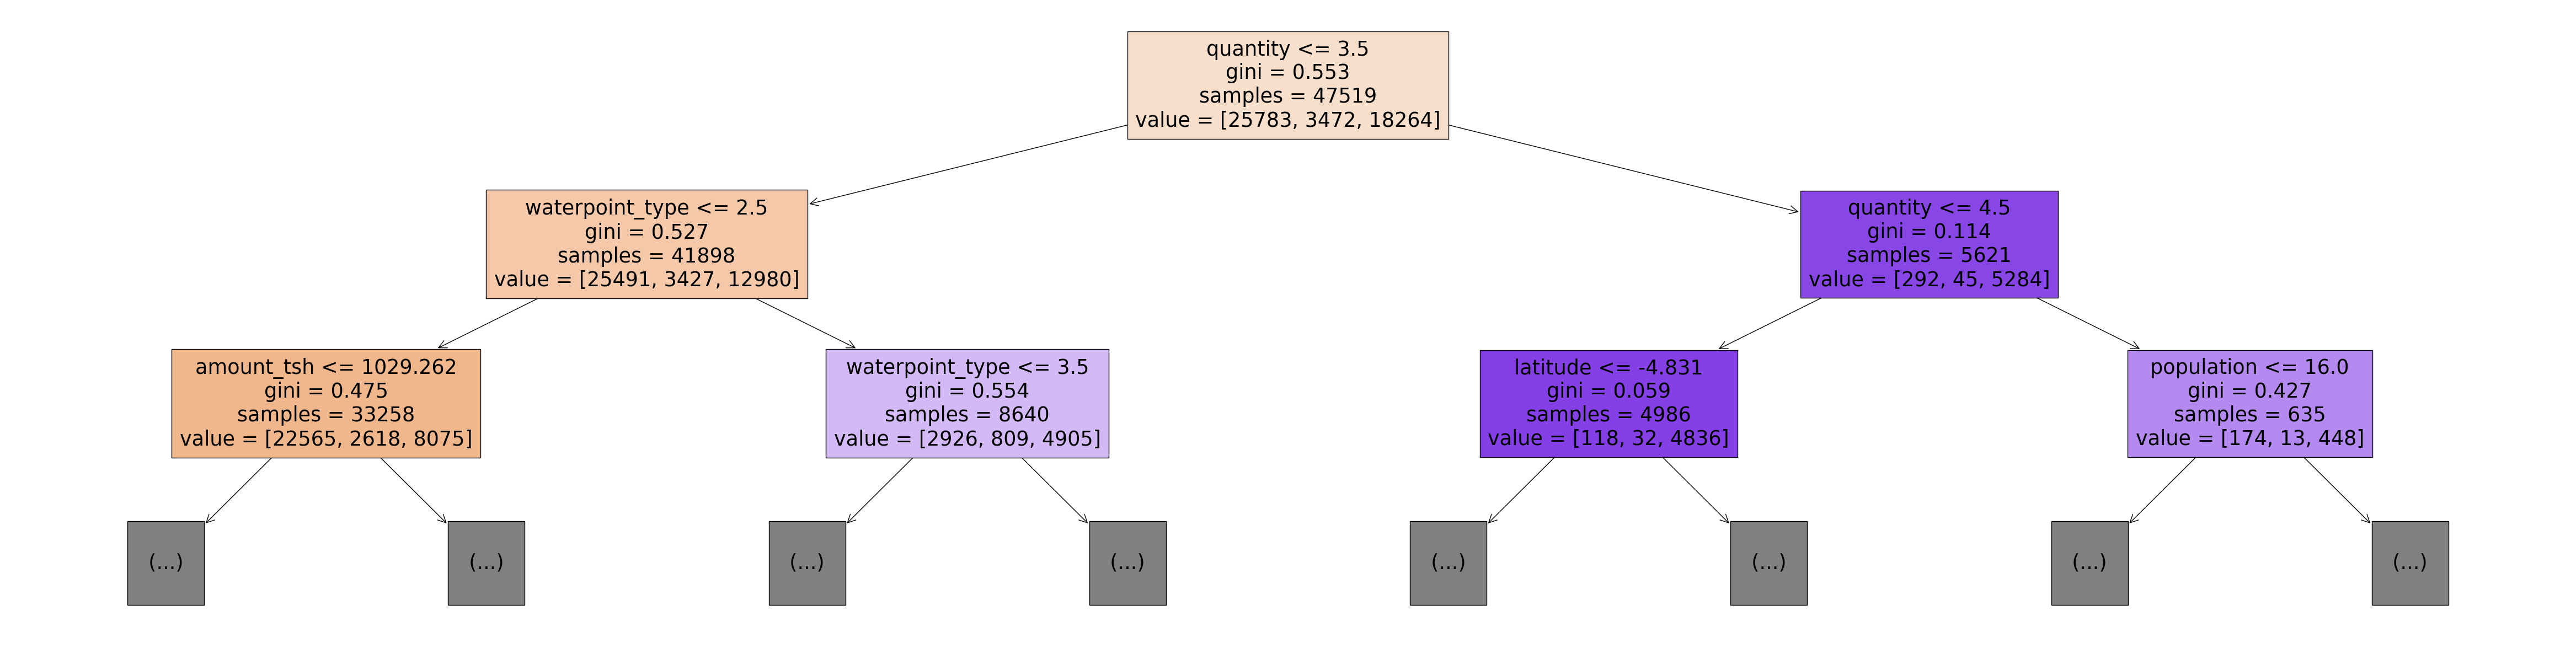

In [32]:
# plot the tree
plt.figure(figsize=(60,15))
plot_tree(model_dt.named_steps['decisiontreeclassifier'], #we're calling model_dt instead of pipeline because with OrdinalEncoder, we aren't adding new columns
          max_depth=2, # This is what displays, not the depth of our actual model
          feature_names=X_train.columns,
          filled=True) # to color the majority classes of our tree


# V. Check Metrics

In [28]:
print('model_lr accuracy score for training', accuracy_score(y_train, model_lr.predict(X_train)))
print('model_lr accuracy score for val', accuracy_score(y_val, model_lr.predict(X_val)))

model_lr accuracy score for training 0.7386729518718829
model_lr accuracy score for val 0.7367845117845118


In [33]:

print('model_dt accuracy score for training', accuracy_score(y_train, model_dt.predict(X_train)))
print('model_dt accuracy score for val', accuracy_score(y_val, model_dt.predict(X_val)))

model_dt accuracy score for training 0.9952650518739873
model_dt accuracy score for val 0.7493265993265993


In [42]:
# after adding max_depth = 16 hyperparameter
print('model_dt accuracy score for training', accuracy_score(y_train, model_dt.predict(X_train)))
print('model_dt accuracy score for val', accuracy_score(y_val, model_dt.predict(X_val)))

# we're able to reduce the overfitting and improve the generalizability of our model

model_dt accuracy score for training 0.8709147919779456
model_dt accuracy score for val 0.7634680134680135


Decision Tree is super overfit, but still better than the logreg model slightly.

# VI. Tune Model

- Some of the hyperparameters for tuning the Decision Tree model:
- min_samples_split - the min number of samples required to split an internal node
- min_samples_leaf - min number of samples required to be at a leaf node or a terminal node (the final results)
- max_features - the number of features to consider when looking for best split - tend to cause overfitting issues

In [36]:
model_dt.named_steps['decisiontreeclassifier'].get_depth()

38

In [34]:
depths = range(5, 20, 2)
list(depths)

[5, 7, 9, 11, 13, 15, 17, 19]

In [38]:
# very similar steps to how we tuned alpha for ridge regression

train_acc = []
val_acc = []

for depth in depths:
  tree_model = make_pipeline(
      OrdinalEncoder(),
      SimpleImputer(),
      DecisionTreeClassifier(max_depth=depth, random_state=42)
  )

  tree_model.fit(X_train, y_train)
  train_acc.append(tree_model.score(X_train, y_train))
  val_acc.append(tree_model.score(X_val, y_val))

## Validation Curves
- When we plot our hyperparameter that I am turning against the accuracy score or any metric on our validation data set

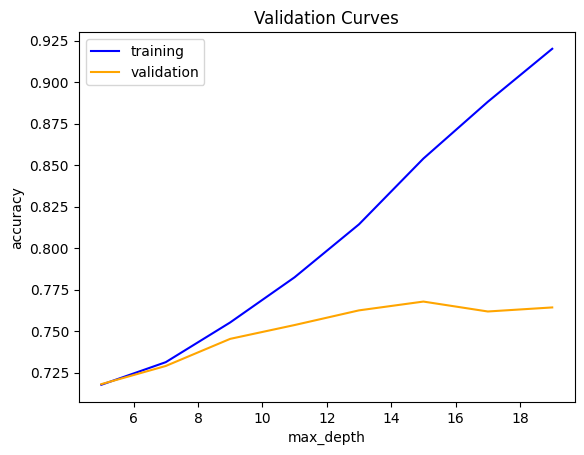

In [39]:
# plot our validation curves
plt.plot(depths, train_acc, color='blue', label='training')
plt.plot(depths, val_acc, color='orange', label='validation')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Validation Curves') # These plots are called VALIDATION CURVES!
plt.legend()
plt.show()

In [40]:
# from validation data set, seems like max depth of 15 or 16 is a good number to work with
# Then we can just go back to our model_dt and sepcify max_depth as 16 in the parameter.

# VII. Communicate Results


### Gini importance

/usr/local/lib/python3.10/dist-packages/category_encoders/utils.py:362: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  warnings.warn("`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.",


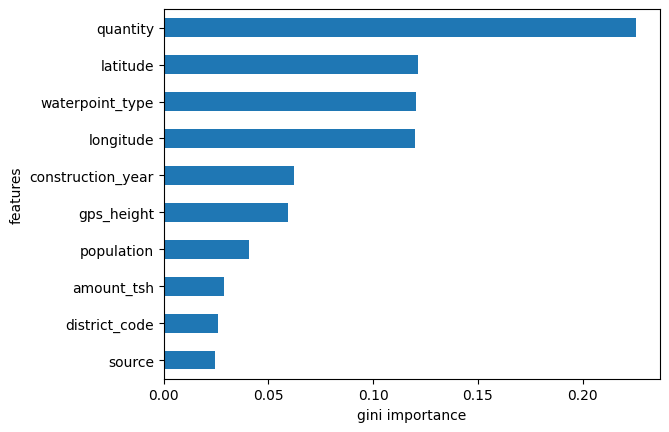

In [47]:
features = model_dt.named_steps['ordinalencoder'].get_feature_names()
gini_importances = model_dt.named_steps['decisiontreeclassifier'].feature_importances_ # this contains all the gini values, same as in LR where it contains all the coefficients
                                                                                    # the underscore _ at the end tells us values aren't calculated until the model fits
pd.Series(data=gini_importances, index=features).sort_values().tail(10).plot(kind='barh') # there won't be pos or neg values, so it will still work without the key=abs argument
plt.ylabel('features')
plt.xlabel('gini importance');

- for Decision Tree model, the feature importance will be how much the feature is used in the tree, aka the normalized total reduction of the criteria brought by that particular feature
- calculated by Gini impurity, the probability of misclassifying data
- One downside of this model: in the bar chart, there's no positive or negative values like in Linear Reg, so we don't know if they're influencing the result as a Yes (Functional water pump) or a No (non-functional water pump)

# VIII. Kaggle Submission

In [48]:
predictions = pd.DataFrame(data=model_lr.predict(X_test), index=X_test.index)

In [49]:
predictions.columns = ['status_group']

In [50]:
predictions

status_group
id                   
50785  non functional
51630      functional
17168  non functional
45559  non functional
49871      functional
...               ...
39307  non functional
18990      functional
28749      functional
33492      functional
68707  non functional

[14358 rows x 1 columns]

In [51]:
# generate CSV
predictions.to_csv('new_submission.csv')

In [52]:
# download to my computer
from google.colab import files
files.download('new_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>